# Overview

This notebook analyzes key financial metrics for Apple, Microsoft and Tesla over the past three fiscal years. The data was manually extracted from 10-K filings and loaded into a pandas DataFrame for analysis.

# Data Import and Cleaning

We begin by uploading the cleaned `.csv` file exported from Excel (with European decimal formatting corrected).

Important steps:
- Used `decimal=','` and `sep=';'` in `pd.read_csv()` to correctly parse numbers
- Stripped extra spaces in column headers
- Ensured all financial columns were properly cast to `float64`

In [26]:
import pandas as pd


In [88]:
from google.colab import files
uploaded = files.upload()

Saving DataAnalysis2.csv to DataAnalysis2.csv


In [91]:
df = pd.read_csv("DataAnalysis2.csv", sep=';', decimal=',')

In [92]:
print(df.dtypes)

Company                  object
Fiscal Year               int64
Total Revenue           float64
Net Income              float64
Total Assets            float64
Total Liabilities       float64
Operating Cash Flow     float64
dtype: object


In [94]:
df.columns = df.columns.str.strip()

In [34]:
print(df.columns.tolist())

['Company', 'Fiscal Year', 'Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Operating Cash Flow', 'Revenue Growth (%)']


# Calculating Growth Metrics

Using `groupby()` and `pct_change()`, we calculated year-over-year percentage growth for Total Revenue and Net Income.

These growth rates allow us to compare how each company scaled over time and assess profitability trends.



In [95]:
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Change in Total Assets (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Change in Total Liabilities (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Growth in Operating Cash Flow (%)'] = df.groupby('Company')['Operating Cash Flow'].pct_change() * 100




In [96]:
print(df)

     Company  Fiscal Year  Total Revenue  Net Income  Total Assets  \
0  Microsoft         2022        198.270      72.738       364.840   
1  Microsoft         2023        211.915      72.361       411.976   
2  Microsoft         2024        245.122      88.136       512.163   
3      Tesla         2022         81.462      12.587         4.828   
4      Tesla         2023         96.773      14.974       106.618   
5      Tesla         2024         97.690       7.091       122.070   
6      Apple         2022        394.328      99.803       352.755   
7      Apple         2023        383.285      96.995       352.583   
8      Apple         2024        391.035      93.736       364.980   

   Total Liabilities  Operating Cash Flow  Revenue Growth (%)  \
0            198.298               72.738                 NaN   
1            205.753               72.361            6.882030   
2            243.686               88.136           15.669962   
3              2.215               14.7

In [97]:
df[['Company', 'Fiscal Year', 'Revenue Growth (%)', 'Net Income Growth (%)',
    'Change in Total Assets (%)', 'Change in Total Liabilities (%)',
    'Growth in Operating Cash Flow (%)']]

,Company,Fiscal Year,Revenue Growth (%),Net Income Growth (%),Change in Total Assets (%),Change in Total Liabilities (%),Growth in Operating Cash Flow (%)
0,Microsoft,2022,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,6.882030,-0.518299,12.919636,3.759493,-0.518299
2,Microsoft,2024,15.669962,21.800417,24.318650,18.436183,21.800417
3,Tesla,2022,NaN,NaN,NaN,NaN,NaN
4,Tesla,2023,18.795267,18.964010,2108.326429,1841.715576,-9.970117
5,Tesla,2024,0.947578,-52.644584,14.492862,12.511335,12.575438
6,Apple,2022,NaN,NaN,NaN,NaN,NaN
7,Apple,2023,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
8,Apple,2024,2.021994,-3.359967,3.516052,6.057424,6.975566


# Visualizations

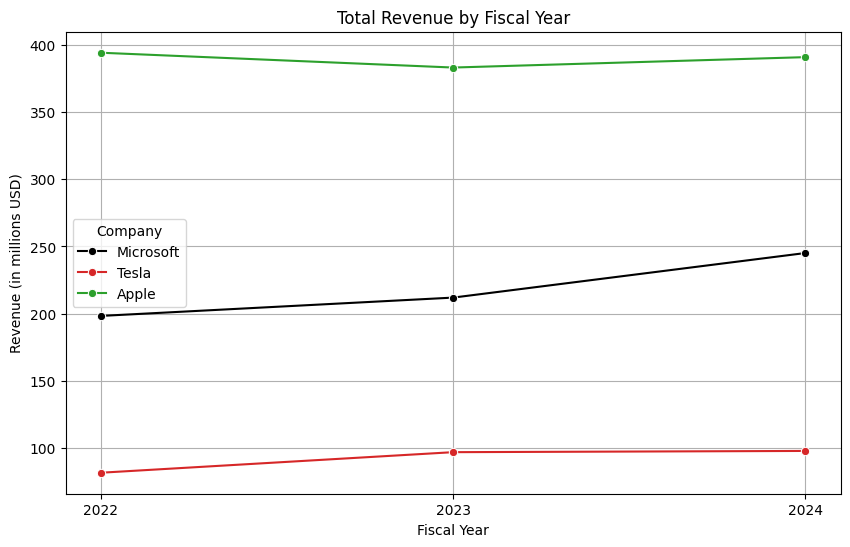

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x='Fiscal Year',
    y='Total Revenue',
    hue='Company',
    palette=custom_palette,
    marker='o'
)

plt.title('Total Revenue by Fiscal Year')
plt.ylabel('Revenue (in millions USD)')
plt.xlabel('Fiscal Year')
plt.grid(True)
plt.xticks(sorted(df['Fiscal Year'].unique()))
plt.show()

# Findings
## Total Revenue Trends (2022–2024)

- Microsoft (black line):
Shows a steady upward trend, with revenue increasing each year. The growth is particularly noticeable between 2023 and 2024, indicating strong momentum.

- Tesla (red line):
Revenue rose from 2022 to 2023 but then flattened between 2023 and 2024, suggesting a slowdown in revenue growth.

- Apple (green line):
Maintains the highest overall revenue among the three companies. Revenue dipped slightly in 2023 but rebounded in 2024, showing relative stability.

## Key Insight:
Microsoft is experiencing consistent and accelerating growth, Apple remains a stable market leader, and Tesla's growth is slowing, possibly entering a plateau phase.

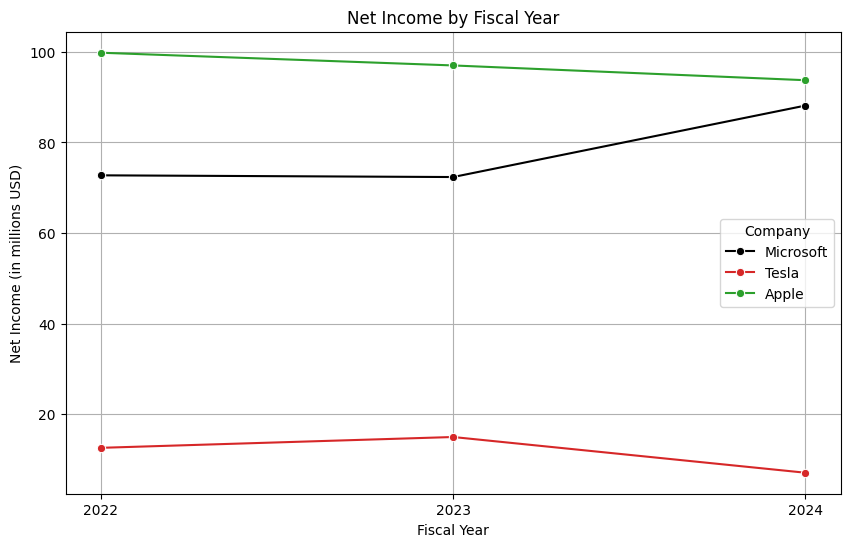

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x='Fiscal Year',
    y='Net Income',
    hue='Company',
    marker='o',
    palette={
        'Microsoft': '#000000',  # Black
        'Tesla': '#d62728',      # Red
        'Apple': '#2ca02c'       # Green
    }
)

plt.title('Net Income by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income (in millions USD)')
plt.grid(True)
plt.xticks(sorted(df['Fiscal Year'].unique()))
plt.show()

# Findings
## Net Income Trends (2022–2024)

### **Microsoft**
2023: Slight decline of –0.52%

2024: Strong recovery with a +21.80% increase

**Interpretation:** After a flat year, Microsoft rebounded sharply in 2024, indicating improved profitability or better cost management.

### **Tesla**

2023: Strong growth of +18.96%

2024: Severe drop of –52.64%

**Interpretation:** Tesla saw a dramatic collapse in net income after growth in 2023 — suggesting rising expenses, margin pressure, or non-recurring losses.

###**Apple**

2023: Decline of –2.81%

2024: Continued decline at –3.36%

**Interpretation:** Apple shows a subtle but persistent decline in net income, hinting at slowing profitability despite stable revenue.

### **Takeaway**

Microsoft: Strong comeback in 2024

Tesla: Volatile performance, sharp reversal

Apple: Consistently trending downward

# **Other Growth Metrics**


## Average Growth By Company

In [102]:
df.groupby('Company')[[
    'Revenue Growth (%)',
    'Net Income Growth (%)',
    'Growth in Operating Cash Flow (%)'
]].mean()

,Revenue Growth (%),Net Income Growth (%),Growth in Operating Cash Flow (%)
Company,,,
Apple,-0.389233,-3.086755,-1.263713
Microsoft,11.275996,10.641059,10.641059
Tesla,9.871422,-16.840287,1.302660


## **Key Findings**

### **Apple**

Revenue Growth: –0.39%

Net Income Growth: –3.09%

Operating Cash Flow Growth: –1.26%

**Summary:** Apple shows negative growth across all metrics, indicating a mature or slowing phase in its financial performance.


### **Microsoft**

Revenue Growth: +11.28%

Net Income Growth: +10.64%

Operating Cash Flow Growth: +10.64%

**Summary:** Microsoft shows strong and balanced growth across revenue, profit, and cash flow — making it the most consistent and healthy performer of the three.


### **Tesla**

Revenue Growth: +9.87%

Net Income Growth: –16.84%

Operating Cash Flow Growth: +1.30%

**Summary:** While Tesla's revenue is growing, it's experiencing a major decline in net income, suggesting profitability issues. Cash flow is growing slowly, possibly due to reinvestment or cost pressures.






## Total Revenue/Income over three fiscal years






In [103]:
df.groupby('Company')['Total Revenue'].sum()


,Total Revenue
Company,
Apple,1168.648
Microsoft,655.307
Tesla,275.925


/tmp/ipython-input-104-2546950240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_totals, x='Company', y='Total Revenue', palette='dark')


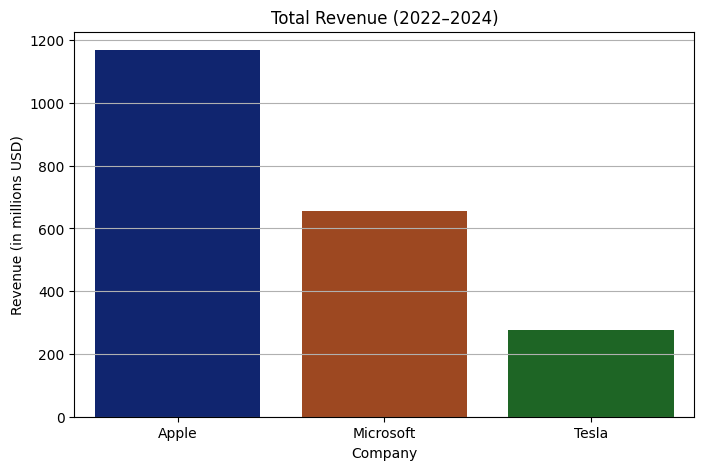

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and aggregate total revenue
revenue_totals = df.groupby('Company')['Total Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_totals, x='Company', y='Total Revenue', palette='dark')

plt.title('Total Revenue (2022–2024)')
plt.ylabel('Revenue (in millions USD)')
plt.xlabel('Company')
plt.grid(axis='y')
plt.show()

## **Key Findings**

### **Apple**

**Total Revenue:** $1,168.65 million

Apple leads with the highest cumulative revenue across the three years.

Despite modest growth, Apple remains the most dominant in scale, highlighting strong market presence and consistent product demand.

### **Microsoft**

**Total Revenue:** $655.31 million

Sits at second place, generating over half of Apple’s total.

This reflects steady growth and a robust business model, especially given Microsoft’s strong upward trend in 2024.

### **Tesla**

**Total Revenue:** $275.93 million

Significantly behind both Apple and Microsoft.

Tesla's lower cumulative revenue reflects either a smaller market scope or early-stage positioning compared to the tech giants.

### **Key Takeaway**

Apple is the undisputed revenue leader over the 3-year period.

Microsoft shows healthy growth and strong performance in second.

Tesla, while growing fast in earlier years, remains much smaller in total revenue, indicating room for expansion or differences in business model scale.

## Average Operating Cash Flow


In [106]:
avg_ocf = df.groupby('Company')['Operating Cash Flow'].mean().reset_index()


/tmp/ipython-input-107-788434988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ocf, x='Company', y='Operating Cash Flow', palette='Blues')


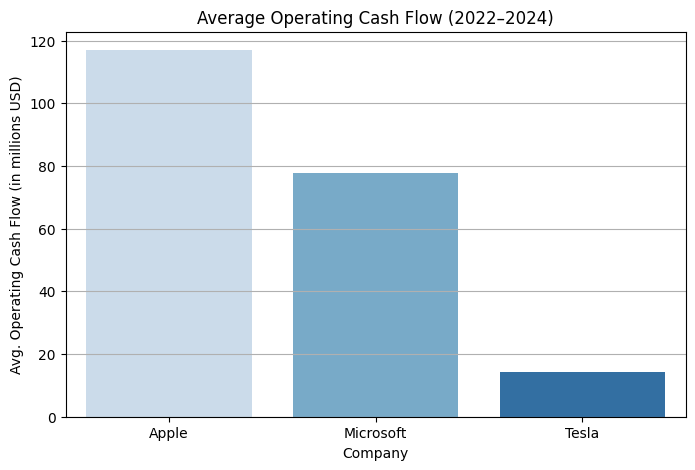

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_ocf, x='Company', y='Operating Cash Flow', palette='Blues')

plt.title('Average Operating Cash Flow (2022–2024)')
plt.ylabel('Avg. Operating Cash Flow (in millions USD)')
plt.xlabel('Company')
plt.grid(axis='y')
plt.show()

## **Key Findings**

### **Apple**

**Avg. OCF:** ~118 million USD

Apple generates the highest average operating cash flow, showing exceptional operational strength and cash efficiency.

This reflects its mature business model, strong product ecosystem, and consistent cash-generating capability.

### **Microsoft**

**Avg. OCF:** ~78 million USD

Microsoft is a strong second, with solid operational cash flow that aligns with its steady revenue and income growth.

Its performance indicates a healthy balance between profitability and scalability.

### **Tesla**

**Avg. OCF:** ~14 million USD

Tesla lags significantly behind in average operating cash flow.

Despite notable revenue growth, this suggests challenges in turning revenue into sustainable cash flow, possibly due to reinvestment, high operating costs, or operational volatility.

# **Conclusion**

This analysis compared the financial performance of Apple, Microsoft, and Tesla across three fiscal years (2022–2024) using key metrics such as total revenue, net income, total assets, liabilities, and operating cash flow.

### **Key Takeaways**:
Apple leads in both total revenue and average operating cash flow, indicating strong scale and operational efficiency, although its growth rates have started to plateau.

Microsoft shows consistent growth across revenue, income, and cash flow, positioning it as a stable performer with solid fundamentals.

Tesla, while experiencing revenue growth, faces volatility in net income and relatively weak operating cash flow — suggesting challenges in profitability and efficiency.

### **Strategic Insight**:
Investors or analysts may view Microsoft as a well-rounded performer.

Apple remains dominant in cash generation but may face slowing momentum.

Tesla shows potential, but further improvement in profitability and cash flow is needed to match the financial maturity of the others.

